In [1]:
import os
import cv2
import numpy as np
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from sklearn.decomposition import PCA

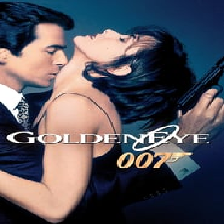

In [2]:
image_path = '/content/drive/MyDrive/MLP-1M/10.jpg'
img = image.load_img(image_path, target_size=(224, 224))
img

In [3]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [9]:
def extract_resnet_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    features = features.flatten()  # Flatten to create a feature vector
    return features

In [10]:
posters_folder = '/content/drive/MyDrive/MLP-1M'

In [11]:
poster_features_resnet = {}

In [12]:
for filename in os.listdir(posters_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        poster_path = os.path.join(posters_folder, filename)
        features = extract_resnet_features(poster_path)
        poster_features_resnet[filename] = features

1/1 [==============================] - 0s 33ms/step


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_movies(target_poster, poster_features):
    # Retrieve the features of the target poster
    target_features = poster_features.get(target_poster)
    if target_features is None:
        print("Target poster not found.")
        return []

    # Calculate similarity scores between the target poster and other posters
    similarity_scores = {}
    for poster, features in poster_features.items():
        if poster != target_poster:
            similarity = cosine_similarity([target_features], [features])[0][0]
            similarity_scores[poster] = similarity

    # Sort movies by similarity scores in descending order
    recommended_movies = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

    return recommended_movies


Movie: 1916.jpg, Similarity Score: 0.29980674386024475
Movie: 2252.jpg, Similarity Score: 0.28566768765449524
Movie: 558.jpg, Similarity Score: 0.28395742177963257
Movie: 3547.jpg, Similarity Score: 0.28242745995521545
Movie: 1770.jpg, Similarity Score: 0.2793213725090027
Movie: 1589.jpg, Similarity Score: 0.2767212688922882
Movie: 2062.jpg, Similarity Score: 0.2747754454612732
Movie: 1507.jpg, Similarity Score: 0.2735190987586975
Movie: 1480.jpg, Similarity Score: 0.27338072657585144
Movie: 2582.jpg, Similarity Score: 0.270305871963501


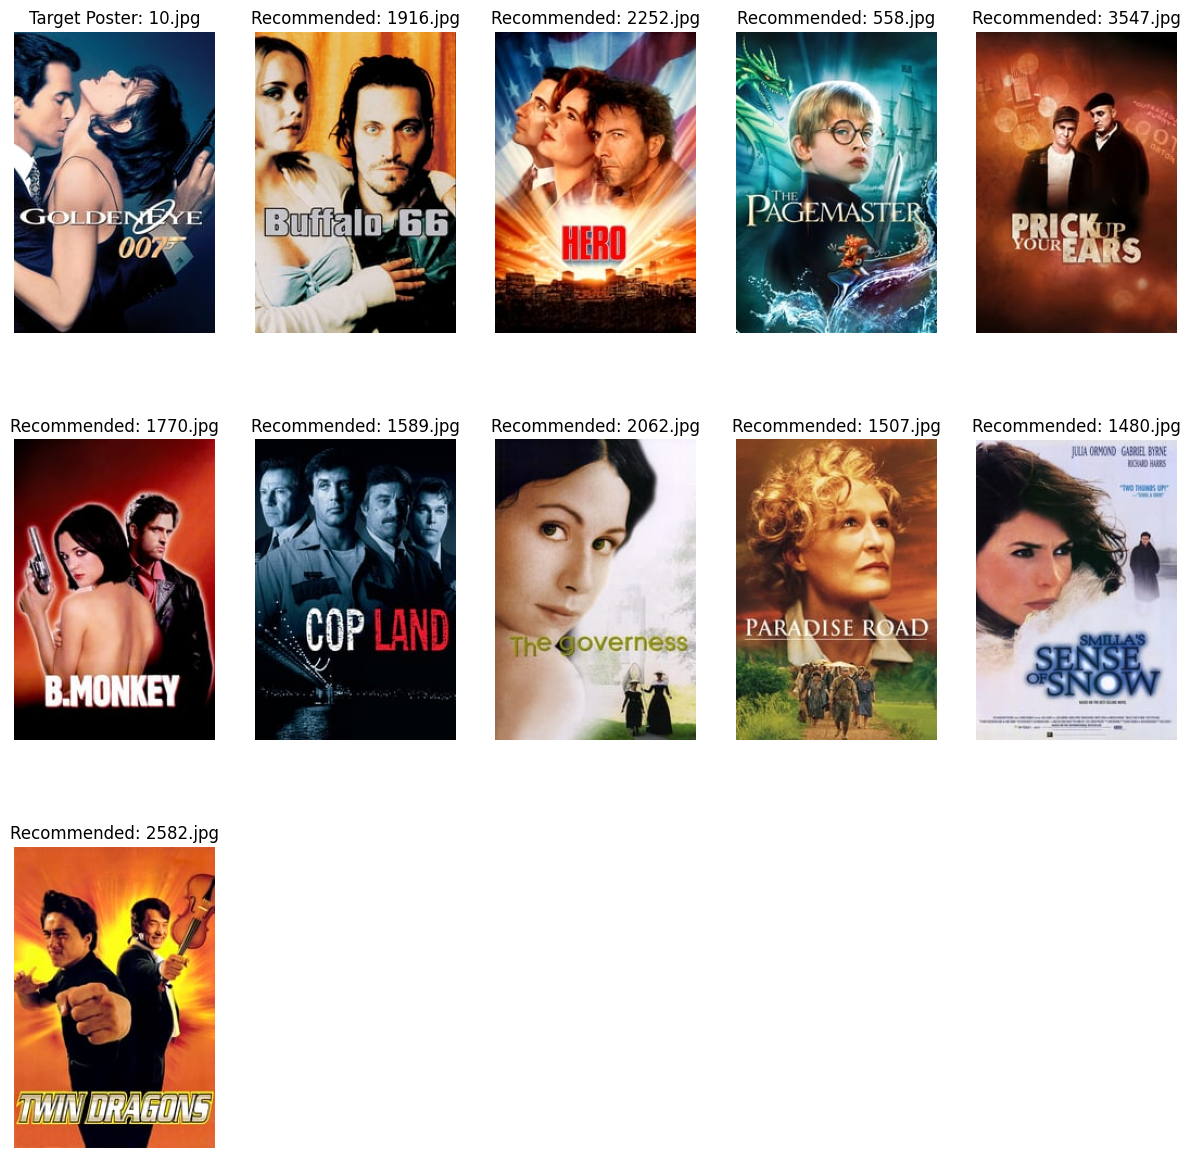

In [19]:
import os
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, titles, cols=5):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(rows, cols, i)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Replace 'target_poster.jpg' with the filename of the movie poster you want recommendations for
target_movie_poster = '10.jpg'

# Get recommendations based on visual similarity to the target movie poster
recommendations = recommend_similar_movies(target_movie_poster, poster_features_resnet)

# Print top recommended movies
top_recommendations = recommendations[:10]  # Adjust the number of recommendations you want to display
for movie, similarity_score in top_recommendations:
    print(f"Movie: {movie}, Similarity Score: {similarity_score}")

# Display the target poster and top recommended posters
poster_folder = '/content/drive/MyDrive/MLP-1M'  # Path to the folder containing posters
images = []
titles = []
images.append(plt.imread(os.path.join(poster_folder, target_movie_poster)))
titles.append(f"Target Poster: {target_movie_poster}")

for recommended_movie, _ in top_recommendations:
    recommended_image = plt.imread(os.path.join(poster_folder, recommended_movie))
    images.append(recommended_image)
    titles.append(f"Recommended: {recommended_movie}")

# Display the images
display_images(images, titles)


In [15]:
import pickle

# File path to save the extracted visual features
features_file_path = '/content/drive/MyDrive/FYP/features_resnet50.pickle'

# Save the poster_features dictionary to a file using pickle
with open(features_file_path, 'wb') as file:
    pickle.dump(poster_features_resnet, file)

print(f"Extracted visual features saved to {features_file_path}")


Extracted visual features saved to /content/drive/MyDrive/FYP/features_resnet50.pickle
